In [1]:
import pandas as pd

In [2]:
train = pd.read_csv('Train.csv')
test = pd.read_csv('Test.csv')

In [3]:
train.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [4]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
categorical = list(train.dtypes.loc[train.dtypes == 'object'].index)
print(categorical)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [6]:
train[categorical].apply(lambda x : len(x.unique()))

Item_Identifier         1559
Item_Fat_Content           5
Item_Type                 16
Outlet_Identifier         10
Outlet_Size                4
Outlet_Location_Type       3
Outlet_Type                4
dtype: int64

In [7]:
train['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [8]:
train['Item_Fat_Content'].value_counts()/train.shape[0]

Low Fat    0.597090
Regular    0.338965
LF         0.037076
reg        0.013728
low fat    0.013141
Name: Item_Fat_Content, dtype: float64

In [9]:
train['Item_Type'].value_counts()/train.shape[0]

Fruits and Vegetables    0.144550
Snack Foods              0.140795
Household                0.106770
Frozen Foods             0.100434
Dairy                    0.080019
Canned                   0.076147
Baking Goods             0.076030
Health and Hygiene       0.061011
Soft Drinks              0.052212
Meat                     0.049865
Breads                   0.029450
Hard Drinks              0.025109
Others                   0.019829
Starchy Foods            0.017365
Breakfast                0.012906
Seafood                  0.007509
Name: Item_Type, dtype: float64

In [10]:
train['Outlet_Identifier'].value_counts()/train.shape[0]

OUT027    0.109703
OUT013    0.109351
OUT049    0.109117
OUT046    0.109117
OUT035    0.109117
OUT045    0.108999
OUT018    0.108882
OUT017    0.108647
OUT010    0.065118
OUT019    0.061950
Name: Outlet_Identifier, dtype: float64

In [11]:
train['Outlet_Size'].value_counts()/train.shape[0]

Medium    0.327702
Small     0.280183
High      0.109351
Name: Outlet_Size, dtype: float64

In [12]:
train['Outlet_Type'].value_counts()/train.shape[0]

Supermarket Type1    0.654347
Grocery Store        0.127068
Supermarket Type3    0.109703
Supermarket Type2    0.108882
Name: Outlet_Type, dtype: float64

In [13]:
ct = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Size'])
print(ct)

Outlet_Size       High  Medium  Small
Item_Fat_Content                     
LF                  32     105     96
Low Fat            556    1660   1425
Regular            313     952    811
low fat             18      34     29
reg                 13      42     27


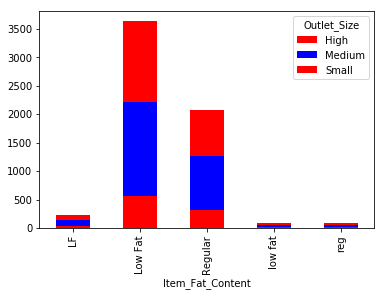

In [14]:
%matplotlib inline
ct.plot(kind = 'bar',stacked = True ,color = ['red','blue'])

In [15]:
ct = pd.crosstab(train['Item_Fat_Content'],train['Item_Outlet_Sales'])
print(ct)

Item_Outlet_Sales  33.2900     33.9558     34.6216     35.2874     36.6190     \
Item_Fat_Content                                                                
LF                          0           0           0           0           0   
Low Fat                     2           0           1           0           2   
Regular                     0           1           0           1           0   
low fat                     0           0           0           0           0   
reg                         0           0           0           0           0   

Item_Outlet_Sales  37.2848     37.9506     38.6164     39.9480     40.6138     \
Item_Fat_Content                                                                
LF                          0           0           0           0           1   
Low Fat                     0           3           2           1           1   
Regular                     1           1           0           1           0   
low fat                    

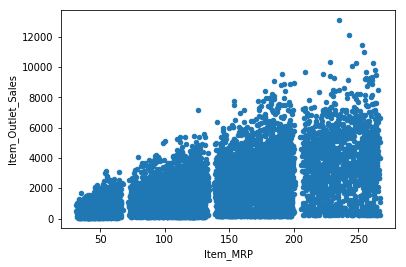

In [16]:
train.plot('Item_MRP','Item_Outlet_Sales',kind = 'scatter')

In [17]:
train.apply(lambda x : sum(x.isnull()))

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [18]:
test.apply(lambda x : sum(x.isnull()))

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [19]:
train['Item_Weight'] = train['Item_Weight'].fillna(train['Item_Weight'].median())
test['Item_Weight'] = test['Item_Weight'].fillna(test['Item_Weight'].median())

In [20]:
train.apply(lambda x : sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [21]:
test.apply(lambda x : sum(x.isnull()))

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [22]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace = True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace = True)

In [23]:
train.apply(lambda x : sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [24]:
test.apply(lambda x : sum(x.isnull()))

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [25]:
cat_val = list(train.dtypes.loc[train.dtypes=='object'].index)
print(cat_val)

['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type']


In [26]:
for val in cat_val:
    freq = train[val].value_counts()/train.shape[0]
    cat_com = freq.loc[freq.values<0.08].index

for cat in cat_com:
    train[cat].replace({cat:'Others'},inplace = True)
    test[cat].replace({cat:'Others'},inplace = True)

In [27]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [28]:
for val in cat_val:
    train[val] = le.fit_transform(train[val])
    test[val] = le.fit_transform(test[val])

In [29]:
train.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
Item_Outlet_Sales            float64
dtype: object

In [30]:
test.dtypes

Item_Identifier                int64
Item_Weight                  float64
Item_Fat_Content               int64
Item_Visibility              float64
Item_Type                      int64
Item_MRP                     float64
Outlet_Identifier              int64
Outlet_Establishment_Year      int64
Outlet_Size                    int64
Outlet_Location_Type           int64
Outlet_Type                    int64
dtype: object

In [31]:
flo_val = list(train.dtypes.loc[train.dtypes=='float64'].index)
print(flo_val)

['Item_Weight', 'Item_Visibility', 'Item_MRP', 'Item_Outlet_Sales']


In [32]:
for val in flo_val:
    train[val] = le.fit_transform(train[val])


In [33]:
train.dtypes

Item_Identifier              int64
Item_Weight                  int64
Item_Fat_Content             int64
Item_Visibility              int64
Item_Type                    int64
Item_MRP                     int64
Outlet_Identifier            int64
Outlet_Establishment_Year    int64
Outlet_Size                  int64
Outlet_Location_Type         int64
Outlet_Type                  int64
Item_Outlet_Sales            int64
dtype: object

In [34]:
flo_val = list(test.dtypes.loc[test.dtypes == 'float64'].index)
print(flo_val)

['Item_Weight', 'Item_Visibility', 'Item_MRP']


In [35]:
for val in flo_val:
    test[val]= le.fit_transform(test[val])
    

In [36]:
test.dtypes

Item_Identifier              int64
Item_Weight                  int64
Item_Fat_Content             int64
Item_Visibility              int64
Item_Type                    int64
Item_MRP                     int64
Outlet_Identifier            int64
Outlet_Establishment_Year    int64
Outlet_Size                  int64
Outlet_Location_Type         int64
Outlet_Type                  int64
dtype: object

In [46]:
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

dep_var = 'Item_Outlet_Sales'
indep_var = [x for x in train.columns if x not in ['Item_Identifier',dep_var]]

In [47]:
x_train,x_test,y_train,y_test = train_test_split(train[indep_var],train[dep_var],test_size = 0.3,random_state = 20)

In [52]:
reg=linear_model.LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
predicted = reg.predict(x_test)

In [54]:
r2_score(y_test,predicted)

0.5544705772713747

In [55]:
print(predicted[:10])

[ 915.42436615 2109.74783042  637.74149014 1475.44016917 1783.13833849
 1582.36057694 1192.80150251 1635.93716902 1573.27670687  895.33883171]


In [44]:
from sklearn.ensemble import AdaBoostRegressor
regressor = AdaBoostRegressor(n_estimators = 100,loss = 'linear',learning_rate = 0.005)

In [56]:
regressor.fit(x_train,y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=0.005, loss='linear',
         n_estimators=100, random_state=None)

In [57]:
predict = regressor.predict(x_test)

In [58]:
r2_score(y_test,predict)

0.6071860818872754

In [59]:
print(predicted[:10])

[ 915.42436615 2109.74783042  637.74149014 1475.44016917 1783.13833849
 1582.36057694 1192.80150251 1635.93716902 1573.27670687  895.33883171]


In [62]:
predict_test =  regressor.predict(test[indep_var])

In [63]:
test.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,403,1,66,13,1460,9,1999,1,0,1
1,1067,223,4,1714,4,965,2,2007,1,1,1
2,1406,337,1,4042,11,4076,0,1998,1,2,0
3,809,156,1,388,13,2522,2,2007,1,1,1
4,1184,316,2,4423,4,3972,5,1985,1,2,3
5,461,286,2,2891,6,1710,8,1997,2,0,1
6,604,389,2,3562,0,382,3,2009,1,2,2
7,266,316,1,410,0,831,5,1985,1,2,3
8,668,79,2,4518,13,1160,7,2002,1,1,1
9,170,60,1,20,0,3260,2,2007,1,1,1


In [64]:
print(predict_test[:10])

[1399.04581994  787.71122995  401.0125     1464.59363958 2318.11187335
 1399.04581994  759.87666264  765.15316315 1301.1128274  2010.60895685]
